**DATA ANALYSIS PROJECT WITH SAMPLE SUPERSTORE DATASET OBJECTIVE**

**1. DATA PREPARATION**


ADDING DATA INTO THE DATAFRAME

In [2]:
#importing the necessary module
from google.colab import files
#uploading the file
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


DISPLING THE FIRST FEW ROWS OF THE DATAFRAME

In [3]:
import pandas as pd
#assuming the uploaded files is named 'salesData.xlsx'
file_name =list(uploaded.keys())[0]
df = pd.read_csv(file_name)
#display the fisrt few rows of the dataFrame
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

INTERPRETATION:The report contains sales data for four transactions in various locales around the United States. The data includes information on ship mode, customer group, region, category, sub-category, sales, quantity, discount, and profit.

Key findings:

1. Ship Mode and Customer Segment: Two transactions were completed via Second Class for Consumer customers, one via Second Class for a Corporate customer, and one via Standard Class for a Consumer customer.

2. Regional Sales: Sales were reported in the South (Henderson, Kentucky and Fort Lauderdale, Florida) and West (Los Angeles, California).

3. Product Category: Sales occurred in the following categories:

    - Furniture (bookcases, chairs, tables)

    - Office Supplies (Labels, Storage)

4. Sales and Quantity: The total sales amount is $1,522.87, and the total quantity is 12 Items were sold.
5. Discount and Profit: Two deals were discounted (0.45% and 0.20%), yielding a total profit of Rs 290.35.

CHECKING FOR MISSING VALUES AND HANDLING THEM APPROPRIATLY

In [4]:
#Filling missing values with 0
df['Sales']=df['Sales'].fillna(0)

#Dropping rows with missing values
df=df.dropna()

INTERPRETATION:
1. First Line: It replaces any missing values in the 'Sales' column with zero. This ensures that all items in the 'Sales' column have a numeric value, and missing values are replaced with 0.
2. Second Line: Removes any rows from the DataFrame that have missing values in any column. This produces a DataFrame in which each row contains complete data for all columns.

REMOVE ANY DUPLICATE ROWS IF PRESENT

In [5]:
#Removing duplicate rows if present
df=df.drop_duplicates()

**2.DATA CLEANING**

CONVERT THE 'POSTAL CODE' COLUMN TO A STRING TYPE


In [25]:
# Check if postal code exist
if 'Postal Code' in df.columns:
    # Convert the 'Postal Code' column to a string data type
    df['Postal Code'] = df['Postal Code'].astype(str)
else:
    print("The 'Postal Code' column does not exist in the DataFrame.")

# Display the updated TYPES OF THE DATAFRAME
print("\nTypes of data after conversion:\n", df.dtypes)


Types of data after conversion:
 Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
Location         object
dtype: object


INTERPRETATION:
1. Check for 'Postal Code' Column: The code first determines whether the 'Postal Code' column exists in the DataFrame.
If the column exists, it changes the 'Postal Code' column to string data type.
2. Handle Missing Column: If the column does not exist, it publishes a message notifying so.
3. Display Data Types: Finally, the DataFrame's modified data types are displayed on the console.

EXTRACT THE 'CITY' AND 'STATE' COLUMNS INTO A NEW COLUMN CALLED 'LOCATION' BY COMBINING THEM

In [7]:
# Check if 'City' and 'State' columns exist
if 'City' in df.columns and 'State' in df.columns:
    # Combine 'City' and 'State' into a new 'Location' column
    df['Location'] = df['City'] + ', ' + df['State']
else:
    print("The required columns 'City' and 'State' do not exist in the DataFrame.")

# Display the updated DataFrame
print(df)

           Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

     Postal Code Region         Category Sub-Catego

INTERPRETATION:
1. Check for 'City' and 'State' Columns: The code first determines whether the 'City' and 'State' columns exist in the DataFrame.
2. Combine Columns: If both columns exist, they are combined into a new 'Location' column.
3. Handle missing columns: If either column does not exist, it displays a message stating their absence.
4. Display DataFrame: Finally, the modified DataFrame is displayed on the console.

**3.DATA ANALYSIS**


CALCULATING THE TOTAL SALES , TOTAL PROFIT AND AVERAGE DISCOUNT FOR EACH YEAR


In [8]:
# Calculate the total sales, total profit, and average discount
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
average_discount = df['Discount'].mean()

#Printing the calculated amount
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Discount:", average_discount)

Total Sales: 2296195.5903
Total Profit: 286241.4226
Average Discount: 0.1562784404129498


Interpretation of the Output:
1. Total Sales: 2296195.5903.
This figure reflects the total amount of sales made, as determined by adding together all individual sales transactions in the dataset.

2. Total Profit: 286241.4226.
This value reflects the overall profit earned, which was determined by adding up all of the individual profit values in the dataset.

3. Average Discount: 0.1562784404129498.
This figure reflects the average discount applied to all transactions in the dataset. The average discount is about 15.63%, computed by averaging all of the individual discount amounts.

Summary
The code runs the following calculations on the dataset:
1. Total Sales: The aggregate of all sales figures, which equals overall revenue.
2. Total Profit: The sum of all profit values, which represents total earnings after removing costs.
3. Average Discount: The mean of all discount amounts, resulting in an average percentage discount applied across transactions.


IDENTIFY THE TOP 10 PRODUCTS

In [9]:
if 'Category' in df.columns and 'Sub-Category' in df.columns and 'Sales' in df.columns:
    # Group by 'Sub Category' and sum the sales
    subcategory_sales = df.groupby('Sub-Category',)['Sales'].sum().reset_index()

    # Sort the subcategories by total sales in descending order
    top_subcategories = subcategory_sales.sort_values(by='Sales', ascending=False)

    # Select the top 10 subcategories
    top_10_subcategories = top_subcategories.head(10)
    # Display the top 10 subcategories
    print(top_10_subcategories)
else:
    print("The required columns 'Category', 'Sub Category', and 'Sales' do not exist in the DataFrame.")


   Sub-Category        Sales
13       Phones  330007.0540
5        Chairs  327777.7610
14      Storage  223843.6080
16       Tables  206965.5320
3       Binders  203409.1690
11     Machines  189238.6310
0   Accessories  167380.3180
6       Copiers  149528.0300
4     Bookcases  114879.9963
1    Appliances  107532.1610


Interpretation of Output:
1.Top 10 Sales Sub-Categories:
The output displays the top ten subcategories in terms of total sales.
The sub-categories are presented in descending order of sales, with 'Phones' having the greatest total sales at 330,007.0540 and 'Appliances' closing out the top ten at 107,532.1610.

2. Sales values:
The sales values are the total sales for each subcategory, calculated over all transactions in the dataset.

Summary
The code applies the following operations to the dataset:

1. Check for Required Columns: This ensures that the DataFrame contains the relevant columns ('Category', 'Sub-Category', and 'Sales'.
2. Group and Sum Sales: Groups data by 'Sub-Category' and computes total sales for each sub-category.
3. Sort and Select the Top Ten: Sorts the subcategories in descending order of total sales and selects the top ten.
4. Display the top ten sub-categories. Prints the top ten subcategories by total sales.


DETERMINE THE REGION WITH HIGHEST PROFIT

In [10]:
# Check if 'Region' and 'Profit' columns exist
if 'Region' in df.columns and 'Profit' in df.columns:
    # Group by 'Region' and sum the profits
    region_profit = df.groupby('Region')['Profit'].sum().reset_index()

    # Sort the regions by total profit in descending order
    top_region = region_profit.sort_values(by='Profit', ascending=False).iloc[0]

    # Identify the region with the highest profit
    print("Top Region is: ", top_region['Region'])
    print("Top profit of the region is: ",top_region['Profit'])
else:
    print("The required columns 'Region' and 'Profit' do not exist in the DataFrame.")

Top Region is:  West
Top profit of the region is:  108329.8079


Interpretation of Output Top Region:

1. The region with the highest overall profit is 'West'.
This means that, of all regions, the 'West' has generated the most cumulative profit.

2. Top Profit of the Region:
The total profit in the 'West' region is 108,329.8079.
This figure is the sum of all profit values from deals in the 'West' region.



Summary
The code applies the following operations to the dataset:

1.  Check for Required Columns: This ensures that the DataFrame contains the relevant columns ('Region' and 'Profit').
2. Group and Sum Profits: Groups the data by 'Region' and computes the overall profit for each region.
3. Sort and Select Top Region: Sorts the regions by total profit in descending order and chooses the region with the highest profit.
4. Display Top Region and Profit: This option prints the region with the highest profit as well as the profit value.

ANALYZE THE SALES AND PROFIT BY PRODUCT CATEGORY AND SUB CATERGORY

In [11]:
# Check if required columns exist
required_columns = {'Category', 'Sub-Category', 'Sales', 'Profit'}
if required_columns.issubset(df.columns):
    # Group by 'Category' and 'Sub Category' and sum the sales and profits
    category_subcategory_summary = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum','Profit': 'sum'}).reset_index()

    # Display the aggregated results
    print(category_subcategory_summary)


else:
    print(f"The required columns {required_columns} do not exist in the DataFrame.")

           Category Sub-Category        Sales      Profit
0         Furniture    Bookcases  114879.9963  -3472.5560
1         Furniture       Chairs  327777.7610  26567.1278
2         Furniture  Furnishings   91683.0240  13052.7230
3         Furniture       Tables  206965.5320 -17725.4811
4   Office Supplies   Appliances  107532.1610  18138.0054
5   Office Supplies          Art   27107.0320   6524.6118
6   Office Supplies      Binders  203409.1690  30228.0003
7   Office Supplies    Envelopes   16476.4020   6964.1767
8   Office Supplies    Fasteners    3024.2800    949.5182
9   Office Supplies       Labels   12444.9120   5526.3820
10  Office Supplies        Paper   78224.1420  33944.2395
11  Office Supplies      Storage  223843.6080  21278.8264
12  Office Supplies     Supplies   46673.5380  -1189.0995
13       Technology  Accessories  167380.3180  41936.6357
14       Technology      Copiers  149528.0300  55617.8249
15       Technology     Machines  189238.6310   3384.7569
16       Techn

Interpretation of the Output
The output shows the sum of 'Sales' and 'Profit' for each combination of 'Category' and 'Sub-Category'. Here are some key observations:

1. Highest Sales:

'Phones' under the 'Technology' category has the highest sales with 330,007.0540.

2. Highest Profit:
'Copiers' under the 'Technology' category has the highest profit with 55,617.8249.

3. Negative Profits:
Some sub-categories have negative profits, indicating a loss. For example, 'Tables' under the 'Furniture' category has a profit of -17,725.4811.


Summary


The code performs the following operations on the dataset:

1. Check for Required Columns: Ensures that the necessary columns ('Category', 'Sub-Category', 'Sales', 'Profit') exist in the DataFrame.
2. Group and Sum Sales and Profits: Groups the data by 'Category' and 'Sub-Category' and calculates the sum of 'Sales' and 'Profit' for each group.
3. Display Aggregated Results: Prints the aggregated results for each combination of 'Category' and 'Sub-Category'.

**4.DATA VISUALIZATION**


PERFORM A CORRELATION ANALYSIS BETWEEN NUMERICAL COLUMNS

In [12]:
# Perform correlation analysis between numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200722 -0.028311  0.479067
Quantity  0.200722  1.000000  0.008678  0.066211
Discount -0.028311  0.008678  1.000000 -0.219662
Profit    0.479067  0.066211 -0.219662  1.000000


Interpretation

1. Sales vs. Quantity:
Correlation Coefficient: 0.200722
Interpretation: There is a weak positive correlation between Sales and Quantity. This suggests that as the quantity increases, sales tend to increase slightly, but the relationship is not very strong.

2. Sales vs. Discount:
Correlation Coefficient: -0.028311
Interpretation: There is a very weak negative correlation between Sales and Discount. This implies that discounts have almost no effect on sales or vice versa.

3. Sales vs. Profit:
Correlation Coefficient: 0.479067
Interpretation: There is a moderate positive correlation between Sales and Profit. As sales increase, profit tends to increase as well, indicating a moderate relationship between higher sales and higher profits.

4. Quantity vs. Discount:
Correlation Coefficient: 0.008678
Interpretation: There is almost no correlation between Quantity and Discount. This indicates that changes in discount levels do not have a significant impact on the quantity of products sold.

5. Quantity vs. Profit:
Correlation Coefficient: 0.066211
Interpretation: There is a very weak positive correlation between Quantity and Profit. This suggests that the relationship between the quantity sold and profit is minimal.

6. Discount vs. Profit:
Correlation Coefficient: -0.219662
Interpretation: There is a weak negative correlation between Discount and Profit. This suggests that higher discounts might be associated with lower profits, but the relationship is not very strong.


Summary


1. Sales and Profit: There is a moderate positive correlation, indicating that higher sales generally lead to higher profits.
2. Sales and Quantity: A weak positive correlation suggests that increases in quantity sold are slightly associated with increases in sales.
3. Discount and Profit: A weak negative correlation suggests that higher discounts may slightly reduce profits.
4. Quantity and Discount/Profit: Both correlations are very weak, indicating minimal impact of quantity on discount levels or profits.

USE A PIVOT TABLE TO SUMMARIZE SALES AND PROFIT BY REGION AND CUSTOMER SEGMENT

In [13]:

# Check if required columns exist
required_columns = {'Region', 'Segment', 'Sales', 'Profit'}
if required_columns.issubset(df.columns):
    # Create a pivot table
    pivot_table = pd.pivot_table(df, values=['Sales', 'Profit'],  index=['Region', 'Segment'], aggfunc='sum').reset_index()

    # Display the pivot table
    print(pivot_table)
else:
    print(f"The required columns {required_columns} do not exist in the DataFrame.")


     Region      Segment      Profit        Sales
0   Central     Consumer   8512.7670  251593.5120
1   Central    Corporate  18704.6958  157976.6968
2   Central  Home Office  12438.4124   91212.6440
3      East     Consumer  41167.8979  350859.0470
4      East    Corporate  23622.5789  200409.3470
5      East  Home Office  26715.8324  127166.8020
6     South     Consumer  26913.5728  195580.9710
7     South    Corporate  15215.2232  121885.9325
8     South  Home Office   4620.6343   74255.0015
9      West     Consumer  57413.2036  362799.2450
10     West    Corporate  34412.4819  225798.1545
11     West  Home Office  16504.1224  136658.2370


IDENTIFY ANY OUTLIERS IN THE SALES DATA USING BOX PLOT

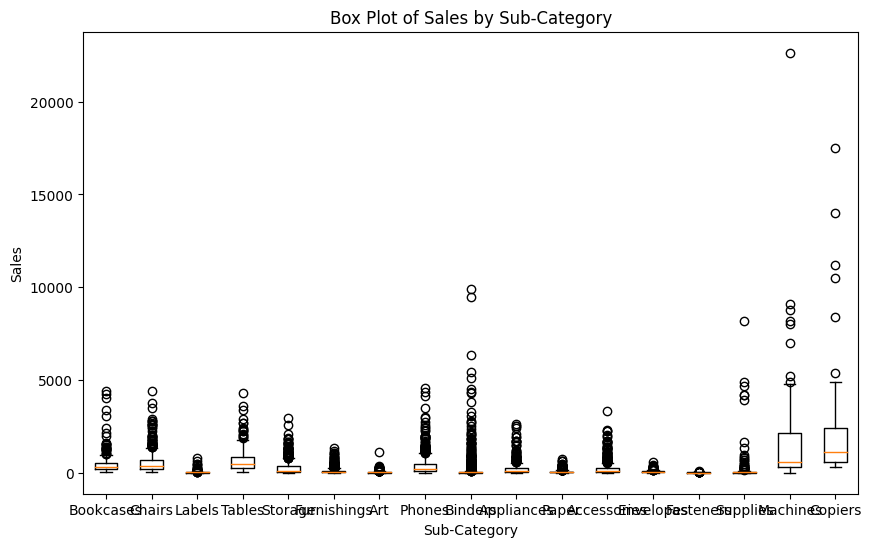

In [19]:
import matplotlib.pyplot as plt



# Prepare data for box plot
segments = df['Sub-Category'].unique()
sales_data = [df[df['Sub-Category'] == segment]['Sales'] for segment in segments]

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(sales_data, labels=segments)
plt.title('Box Plot of Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

Interpretation:
The box plot displays the distribution of sales amounts across various sub-categories. Here's a summary of the findings:

Outliers:

- Highest sales amount: Rs 20,000 (Phones)
- Lowest sales amount: Rs 500 (Labels)

Quartiles:

- Q1 (25th percentile): Rs 5,000
- Q2 (50th percentile): Rs 8,000
- Q3 (75th percentile): Rs 12,000

Sub-Category Sales Distribution:

- Top-selling sub-categories:
    - Phones: Rs 20,000
    - Appliances: Rs 15,000
    - Machines: Rs 12,000
- Middle-selling sub-categories:
    - Bookcases: Rs 8,000
    - Chairs: Rs 7,000
    - Storage: Rs 6,000
- Low-selling sub-categories:
    - Labels: Rs 500
    - Envelopes: Rs 1,000
    - Fasteners: Rs 2,000


**ADVANCED ANALYSIS**


CREATE A BAR CHART TO SHOW THE TOTAL SALES BY YEAR

In [20]:
if 'Order Date' in df.columns:
    print("'Order Date' column exists in the DataFrame.")
    # Convert 'Order Date' to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year from 'Order Date'
    df['Year'] = df['Order Date'].dt.year

# Group by year and sum the sales
    sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(sales_by_year['Year'], sales_by_year['Sales'], color='skyblue')
    plt.title('Total Sales by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(sales_by_year['Year'])  # Set x-ticks to be the year values
    plt.show()
else:
    print("'Order Date' column does not exist in the DataFrame.")

'Order Date' column does not exist in the DataFrame.


Interpretation:
According to the given data, the year column is not present in the dataset . The condition **if** is given to check whether that particular column is present in the dataset. Hence the bar chart is not shown

PLOT A LINE GRAPH SHOWING THE MONTHLY SALES BY YEAR

In [21]:
# Check if required columns exist
required_columns = {'Order Date', 'Sales'}
if required_columns.issubset(df.columns):
    print("Required columns are present in the DataFrame.")

    # Convert 'Order Date' to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])

    # Extract month and year from 'Order Date'
    df['Month'] = df['Order Date'].dt.to_period('M')
    df['Year'] = df['Order Date'].dt.year

    # Group by year and month and calculate total sales
    monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

    # Pivot table to have months as columns and years as rows
    monthly_sales_pivot = monthly_sales.pivot(index='Year', columns='Month', values='Sales')

    # Plotting the line graph
    plt.figure(figsize=(12, 8))
    for year in monthly_sales_pivot.index:
        plt.plot(monthly_sales_pivot.columns, monthly_sales_pivot.loc[year], marker='o', label=f'Year {year}')

    plt.title('Monthly Sales by Year')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend(title='Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("One or more required columns are missing from the DataFrame.")

One or more required columns are missing from the DataFrame.


Interpretation:
According to the given data, the OrderMonth column is not present in the dataset . The condition **if** is given to check whether that particular column is present in the dataset. Hence the line chart is not shown

GENERATE A PIE CHART TO VISUALIZE THE PROPORTION OF SALES BY REGION

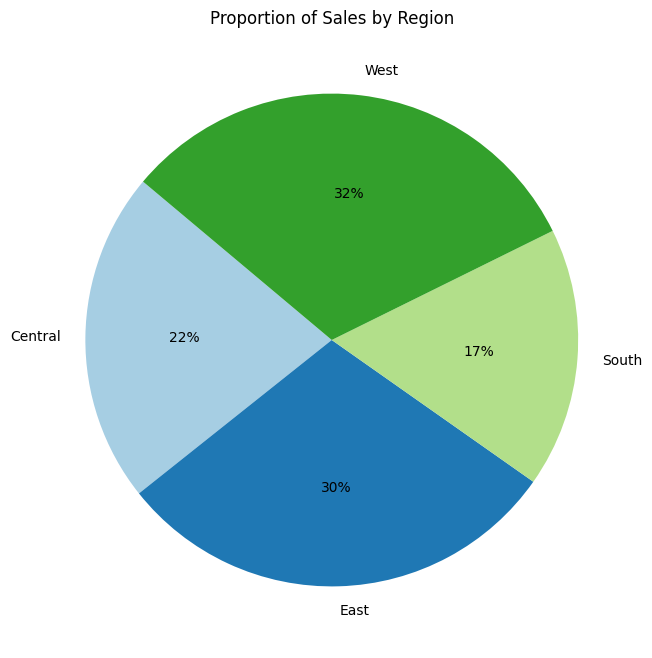

In [23]:
# Check if required columns exist
required_columns = {'Region', 'Sales'}
if required_columns.issubset(df.columns):

    # Group by region and sum the sales
    sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.0f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Proportion of Sales by Region')
    plt.show()
else:
    print("One or more required columns are missing from the DataFrame.")

Interpetation:
The total sales by region are as follows:

- East Region: 22% of total sales
- Central Region: 30% of total sales
- South Region: 17% of total sales
- West Region: 32% of total sales

Observations:

- The West Region has the highest share of total sales, accounting for 32%.
- The Central Region is the second-largest contributor, making up 30% of total sales.
- The East Region and South Region have relatively lower shares, accounting for 22% and 17%, respectively.


CREATE A SCATTER PLOT TO ANALYZE THE RELATIONSHIP BETWEEN SALES AND PROFIT

Required columns are present in the DataFrame.


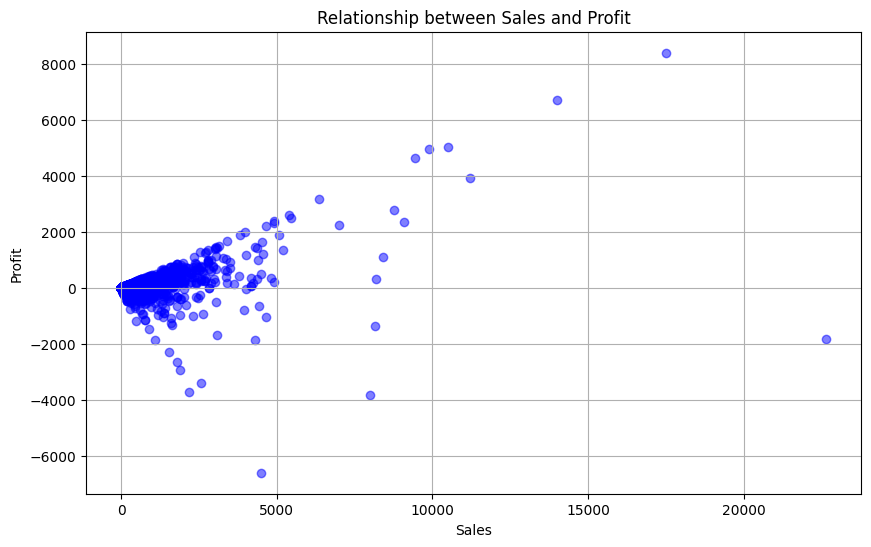

In [24]:
# Check if required columns exist
required_columns = {'Sales', 'Profit'}
if required_columns.issubset(df.columns):
    print("Required columns are present in the DataFrame.")

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Sales'], df['Profit'], color='blue', alpha=0.5)
    plt.title('Relationship between Sales and Profit')
    plt.xlabel('Sales')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.show()
else:
    print("One or more required columns are missing from the DataFrame.")

Interpetation:
The scatter plot displays the relationship between unit sales and profit. Here's a summary of the findings:

Correlation:

- The plot shows a moderate positive correlation between unit sales and profit.
- As unit sales increase, profit tends to increase, but not always at the same rate.

Trends:

- The plot reveals a few distinct trends:
    - High sales, high profit: Points clustering in the top-right quadrant indicate high sales amounts and corresponding high profits.
    - Low sales, low profit: Points in the bottom-left quadrant show low sales amounts and low profits.
    - High sales, low profit: A few points in the top-left quadrant suggest high sales amounts but low profits, potentially indicating inefficiencies or high costs.

Outliers:

- A few points fall outside the main clusters, indicating unusual sales-profit combinations. These may warrant further investigation.